/home/newhouse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


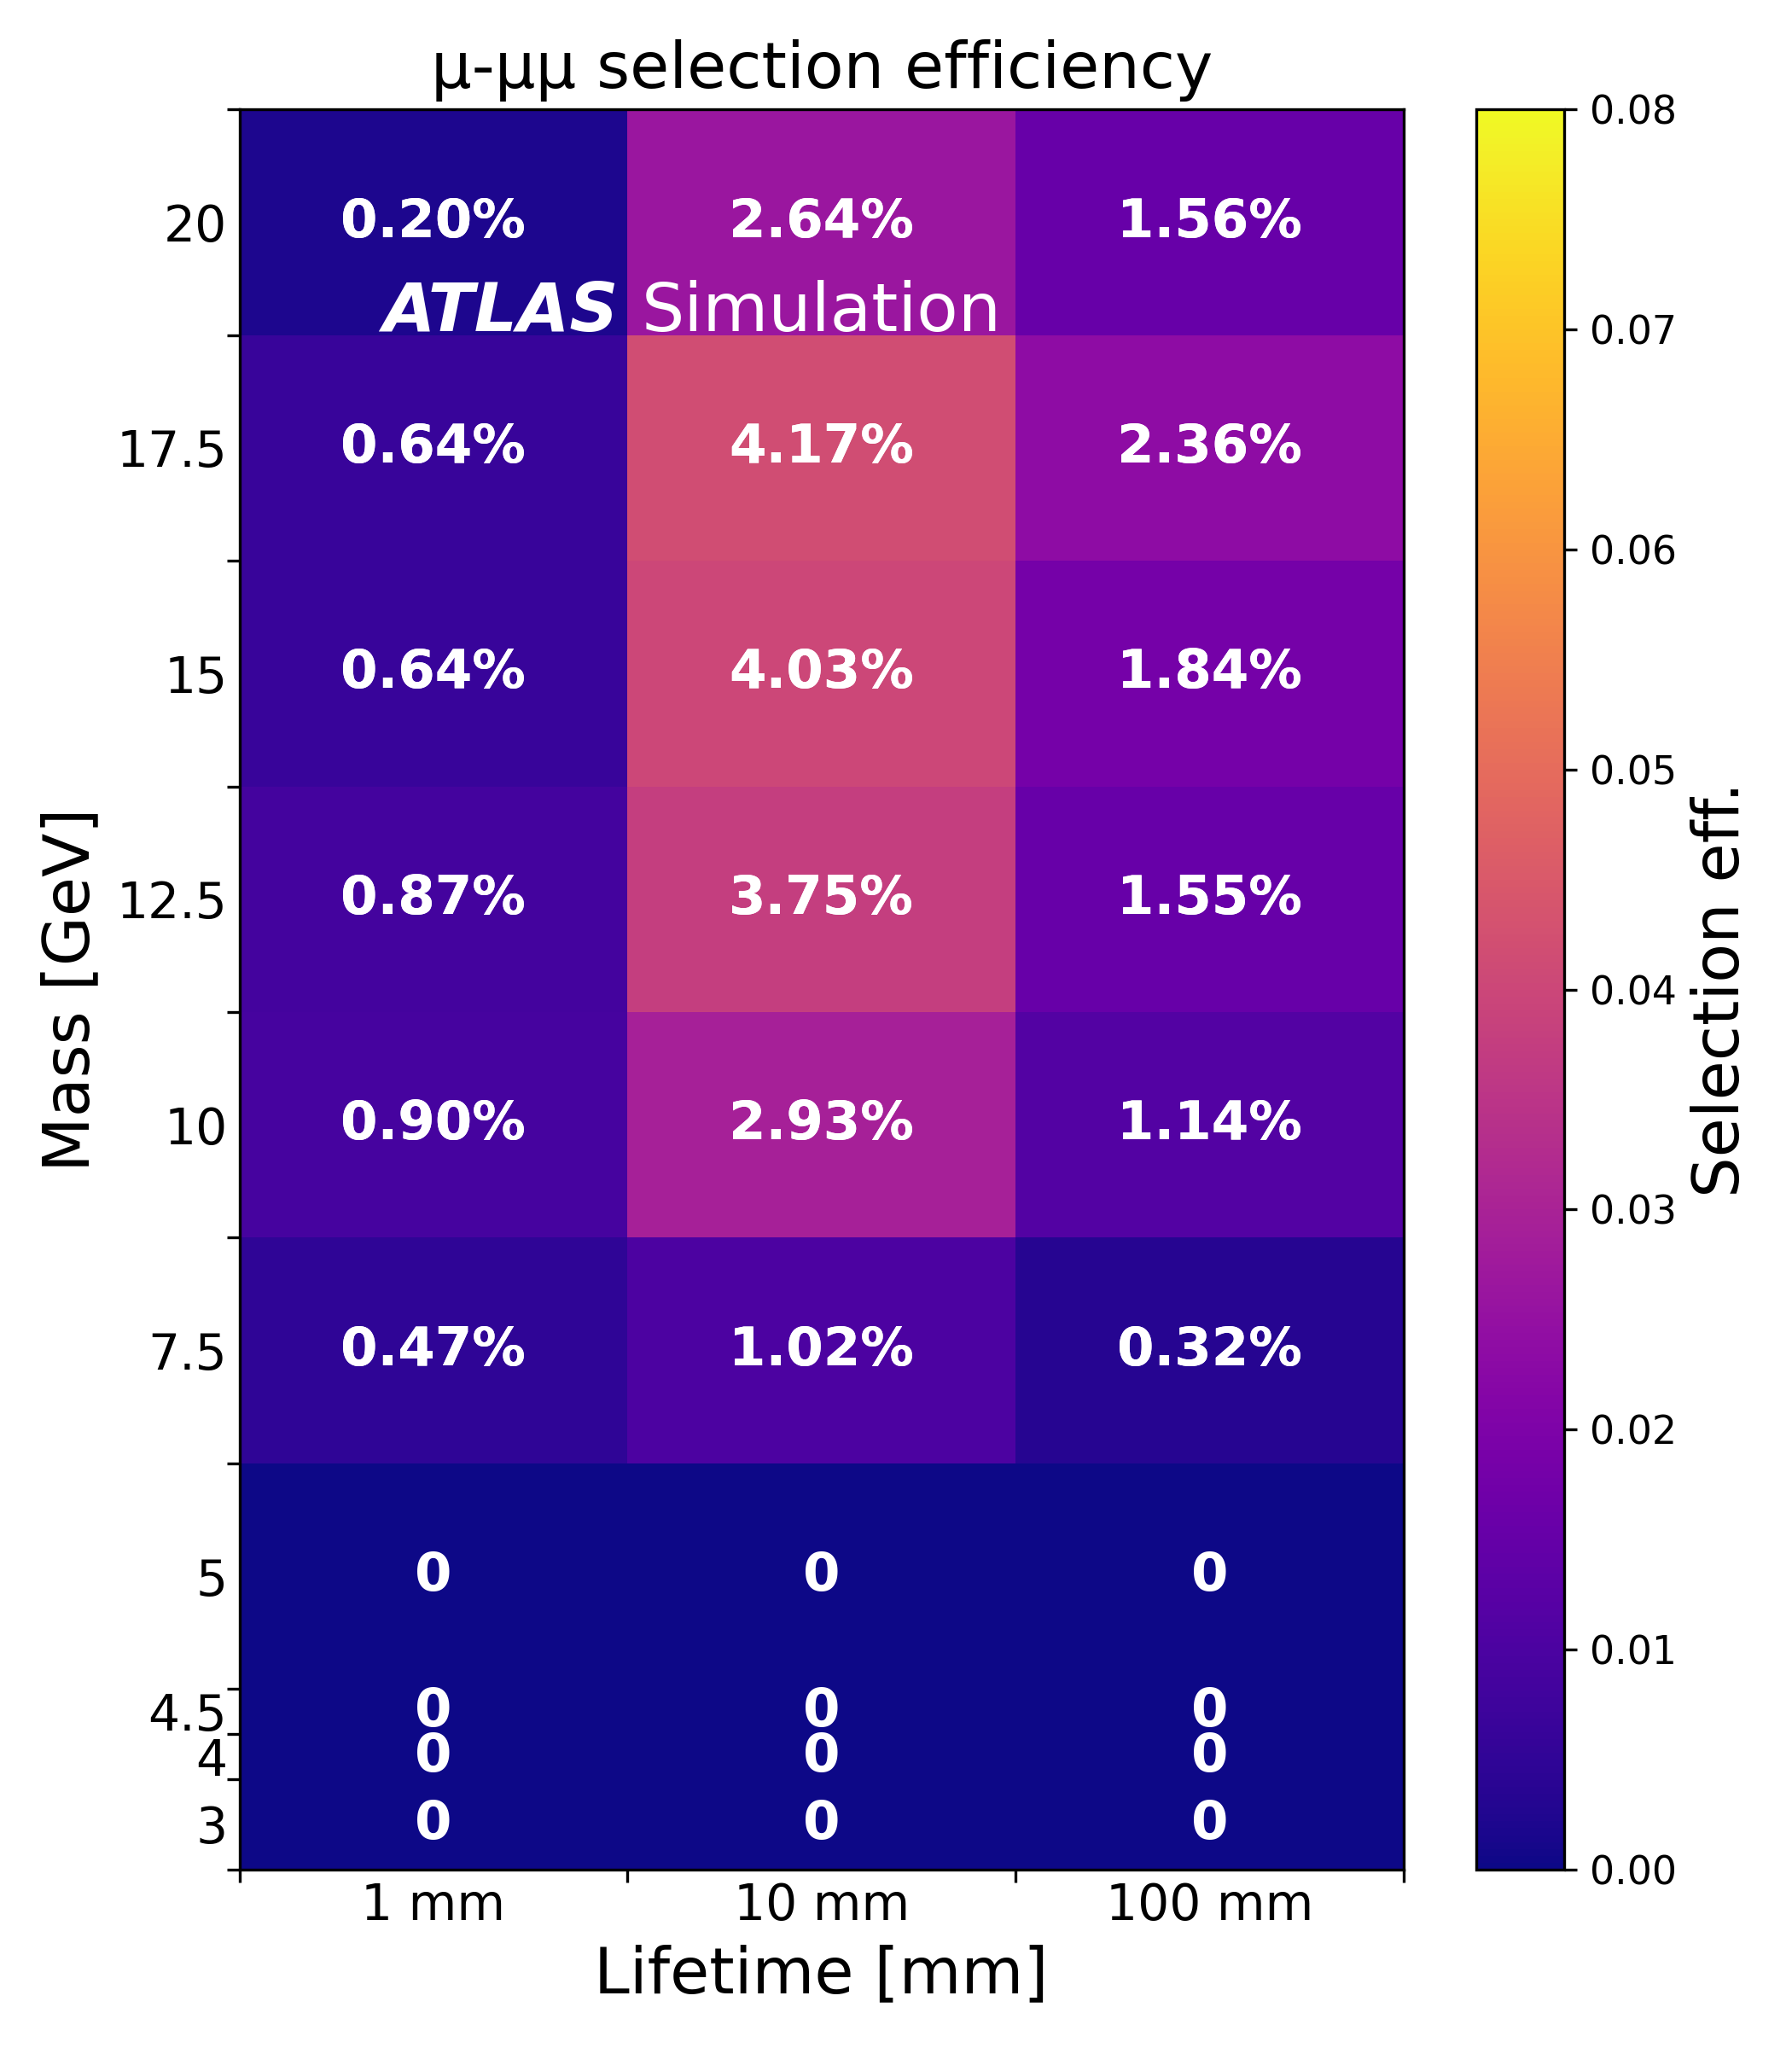

/home/newhouse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


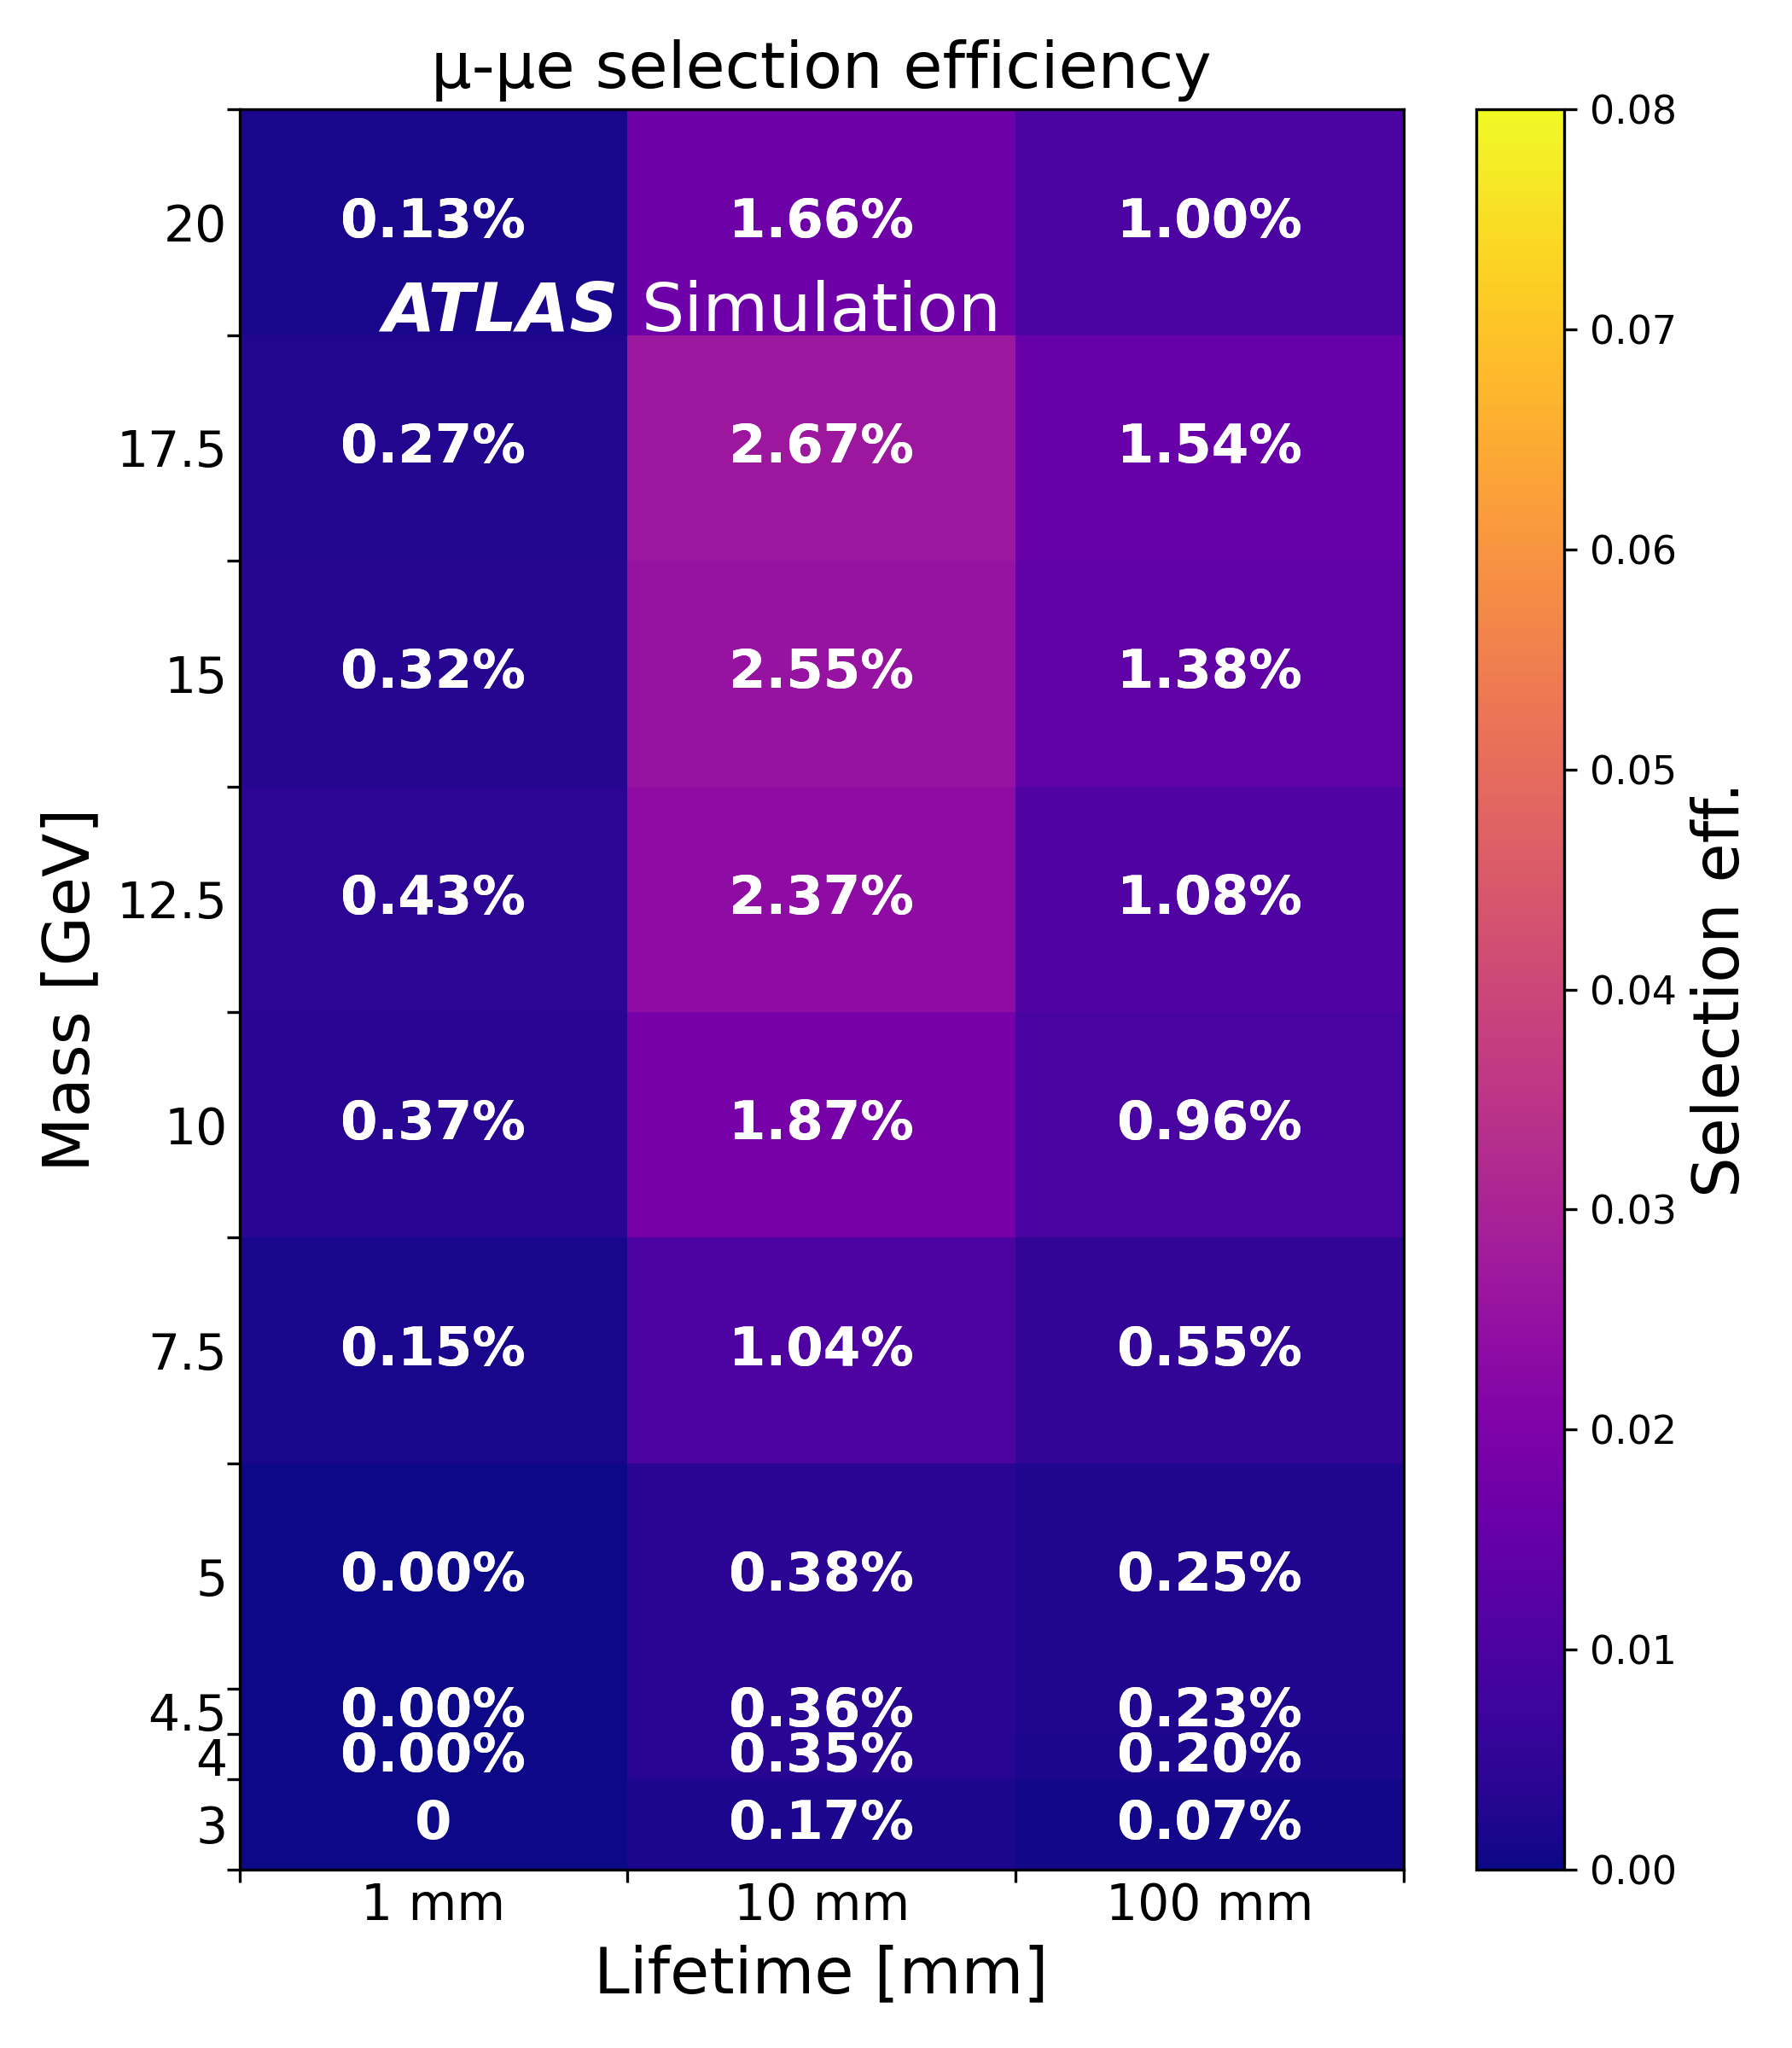

/home/newhouse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


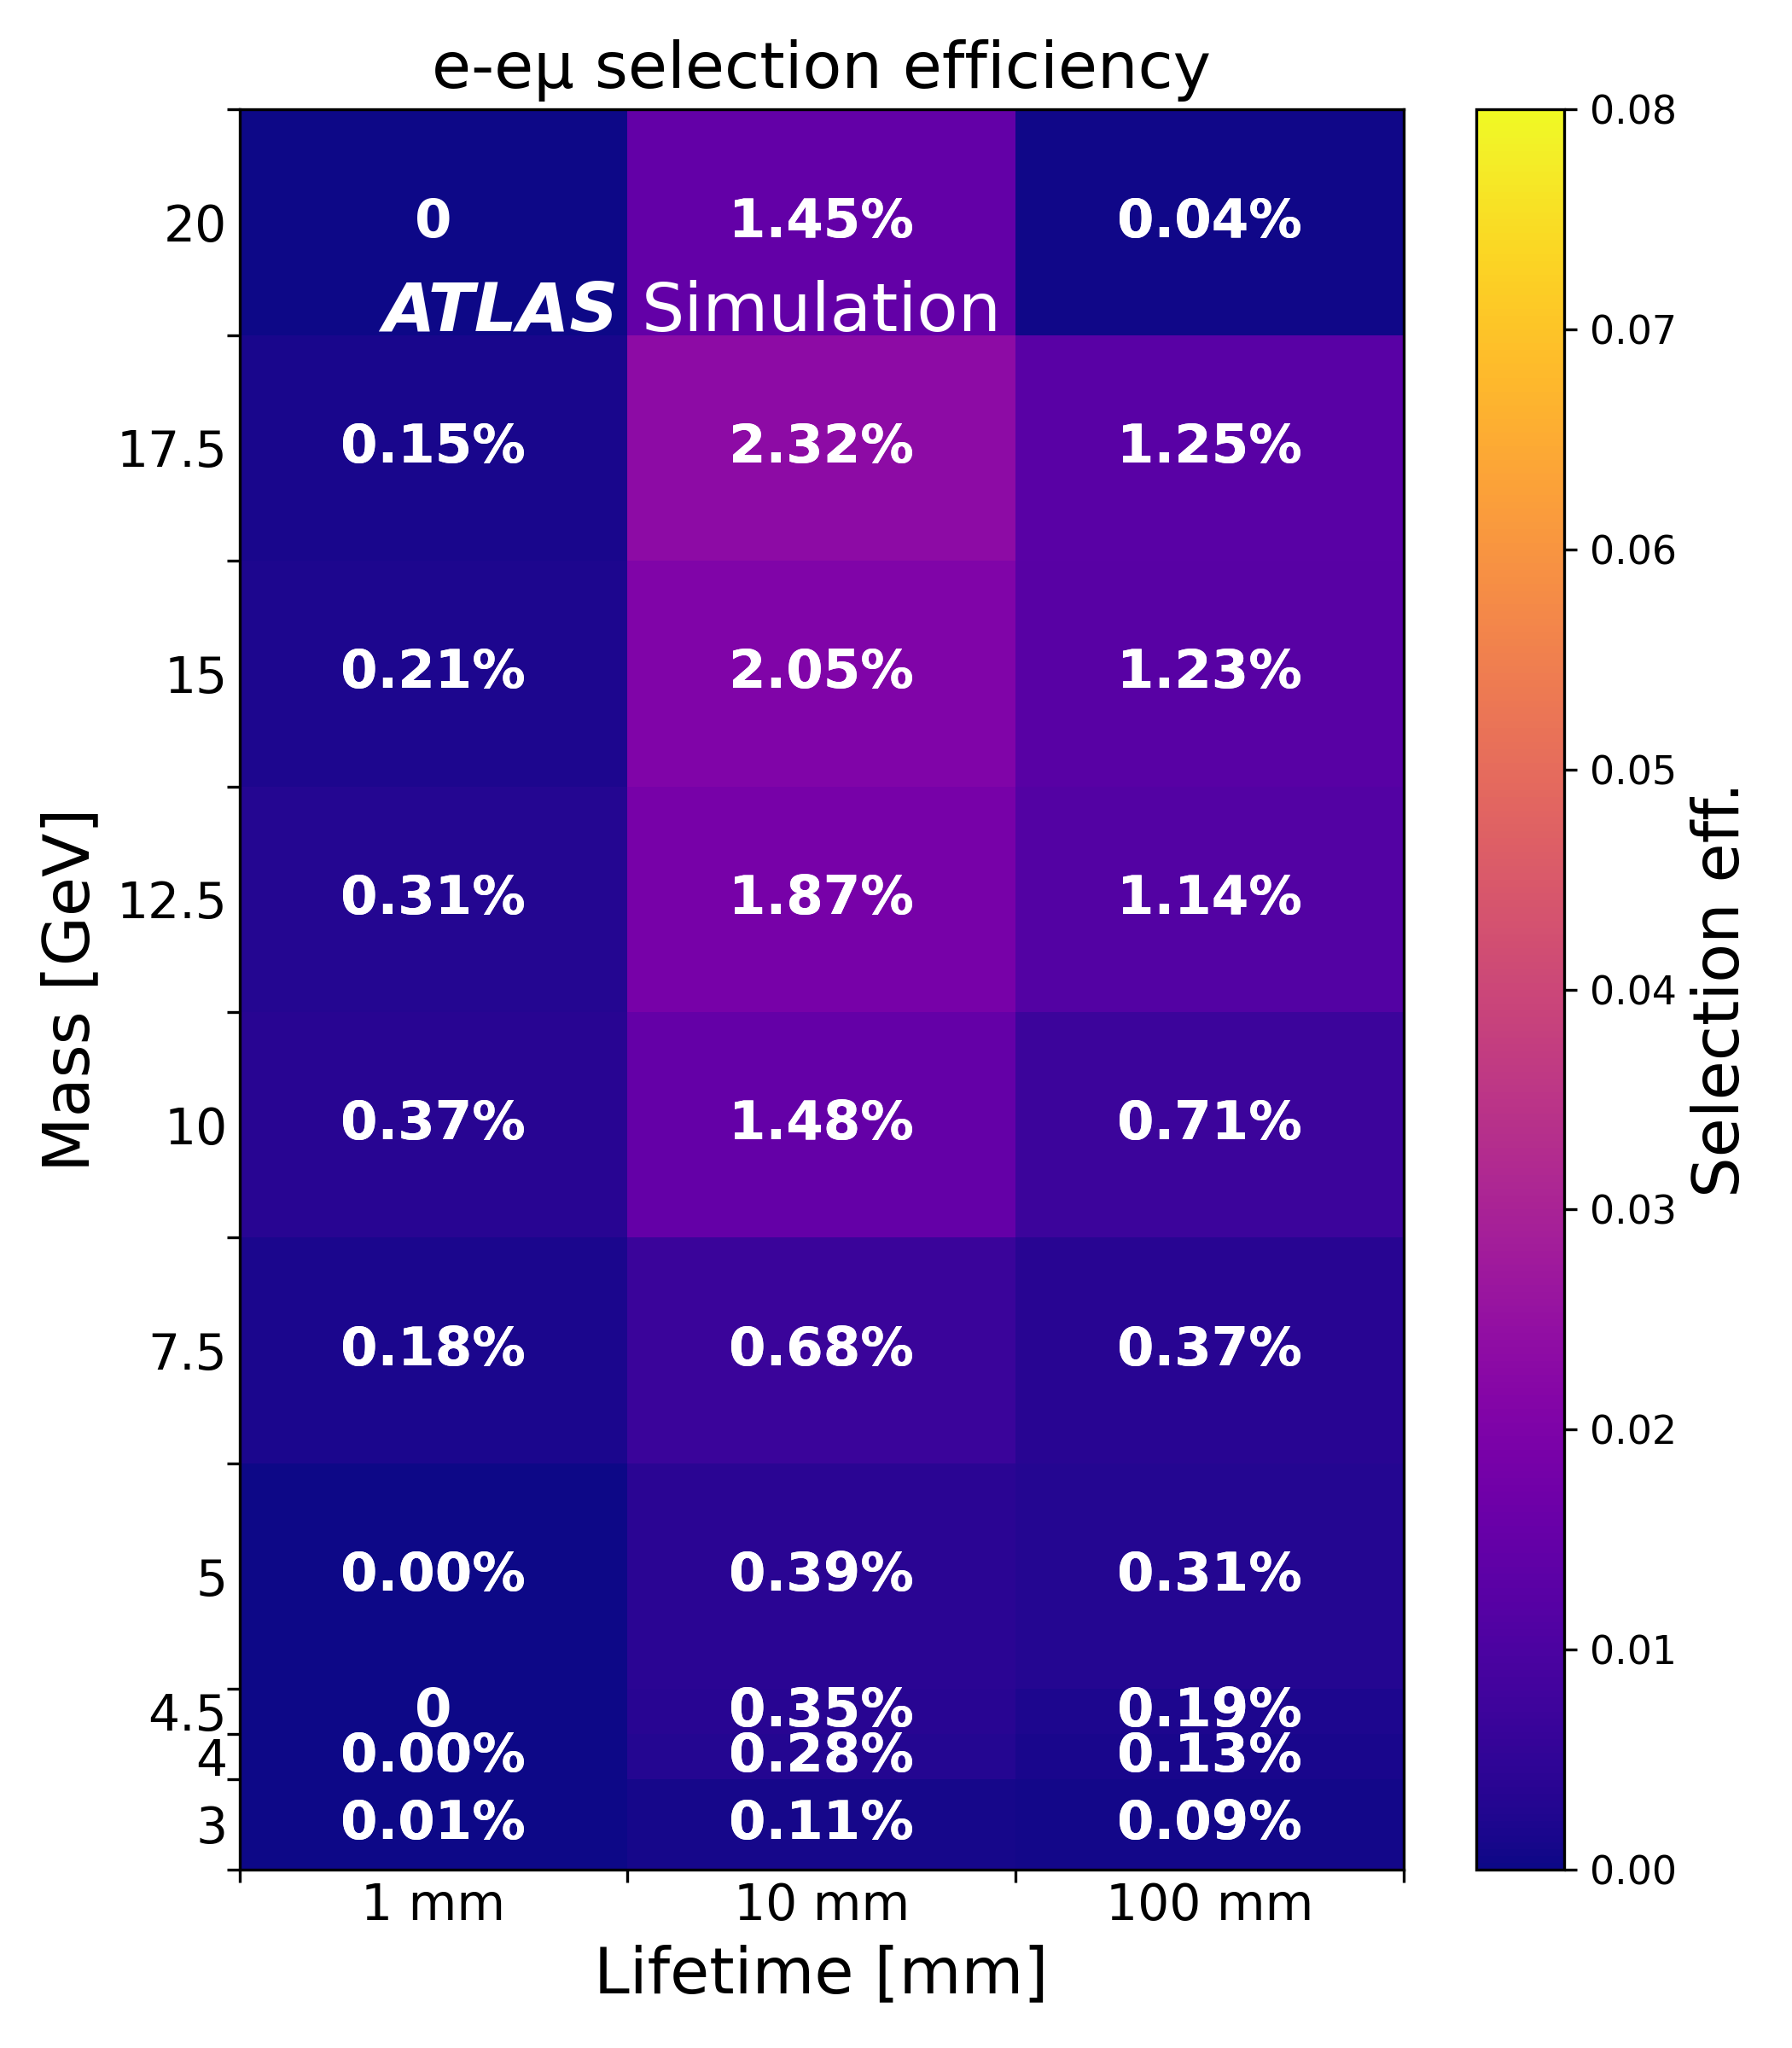

/home/newhouse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


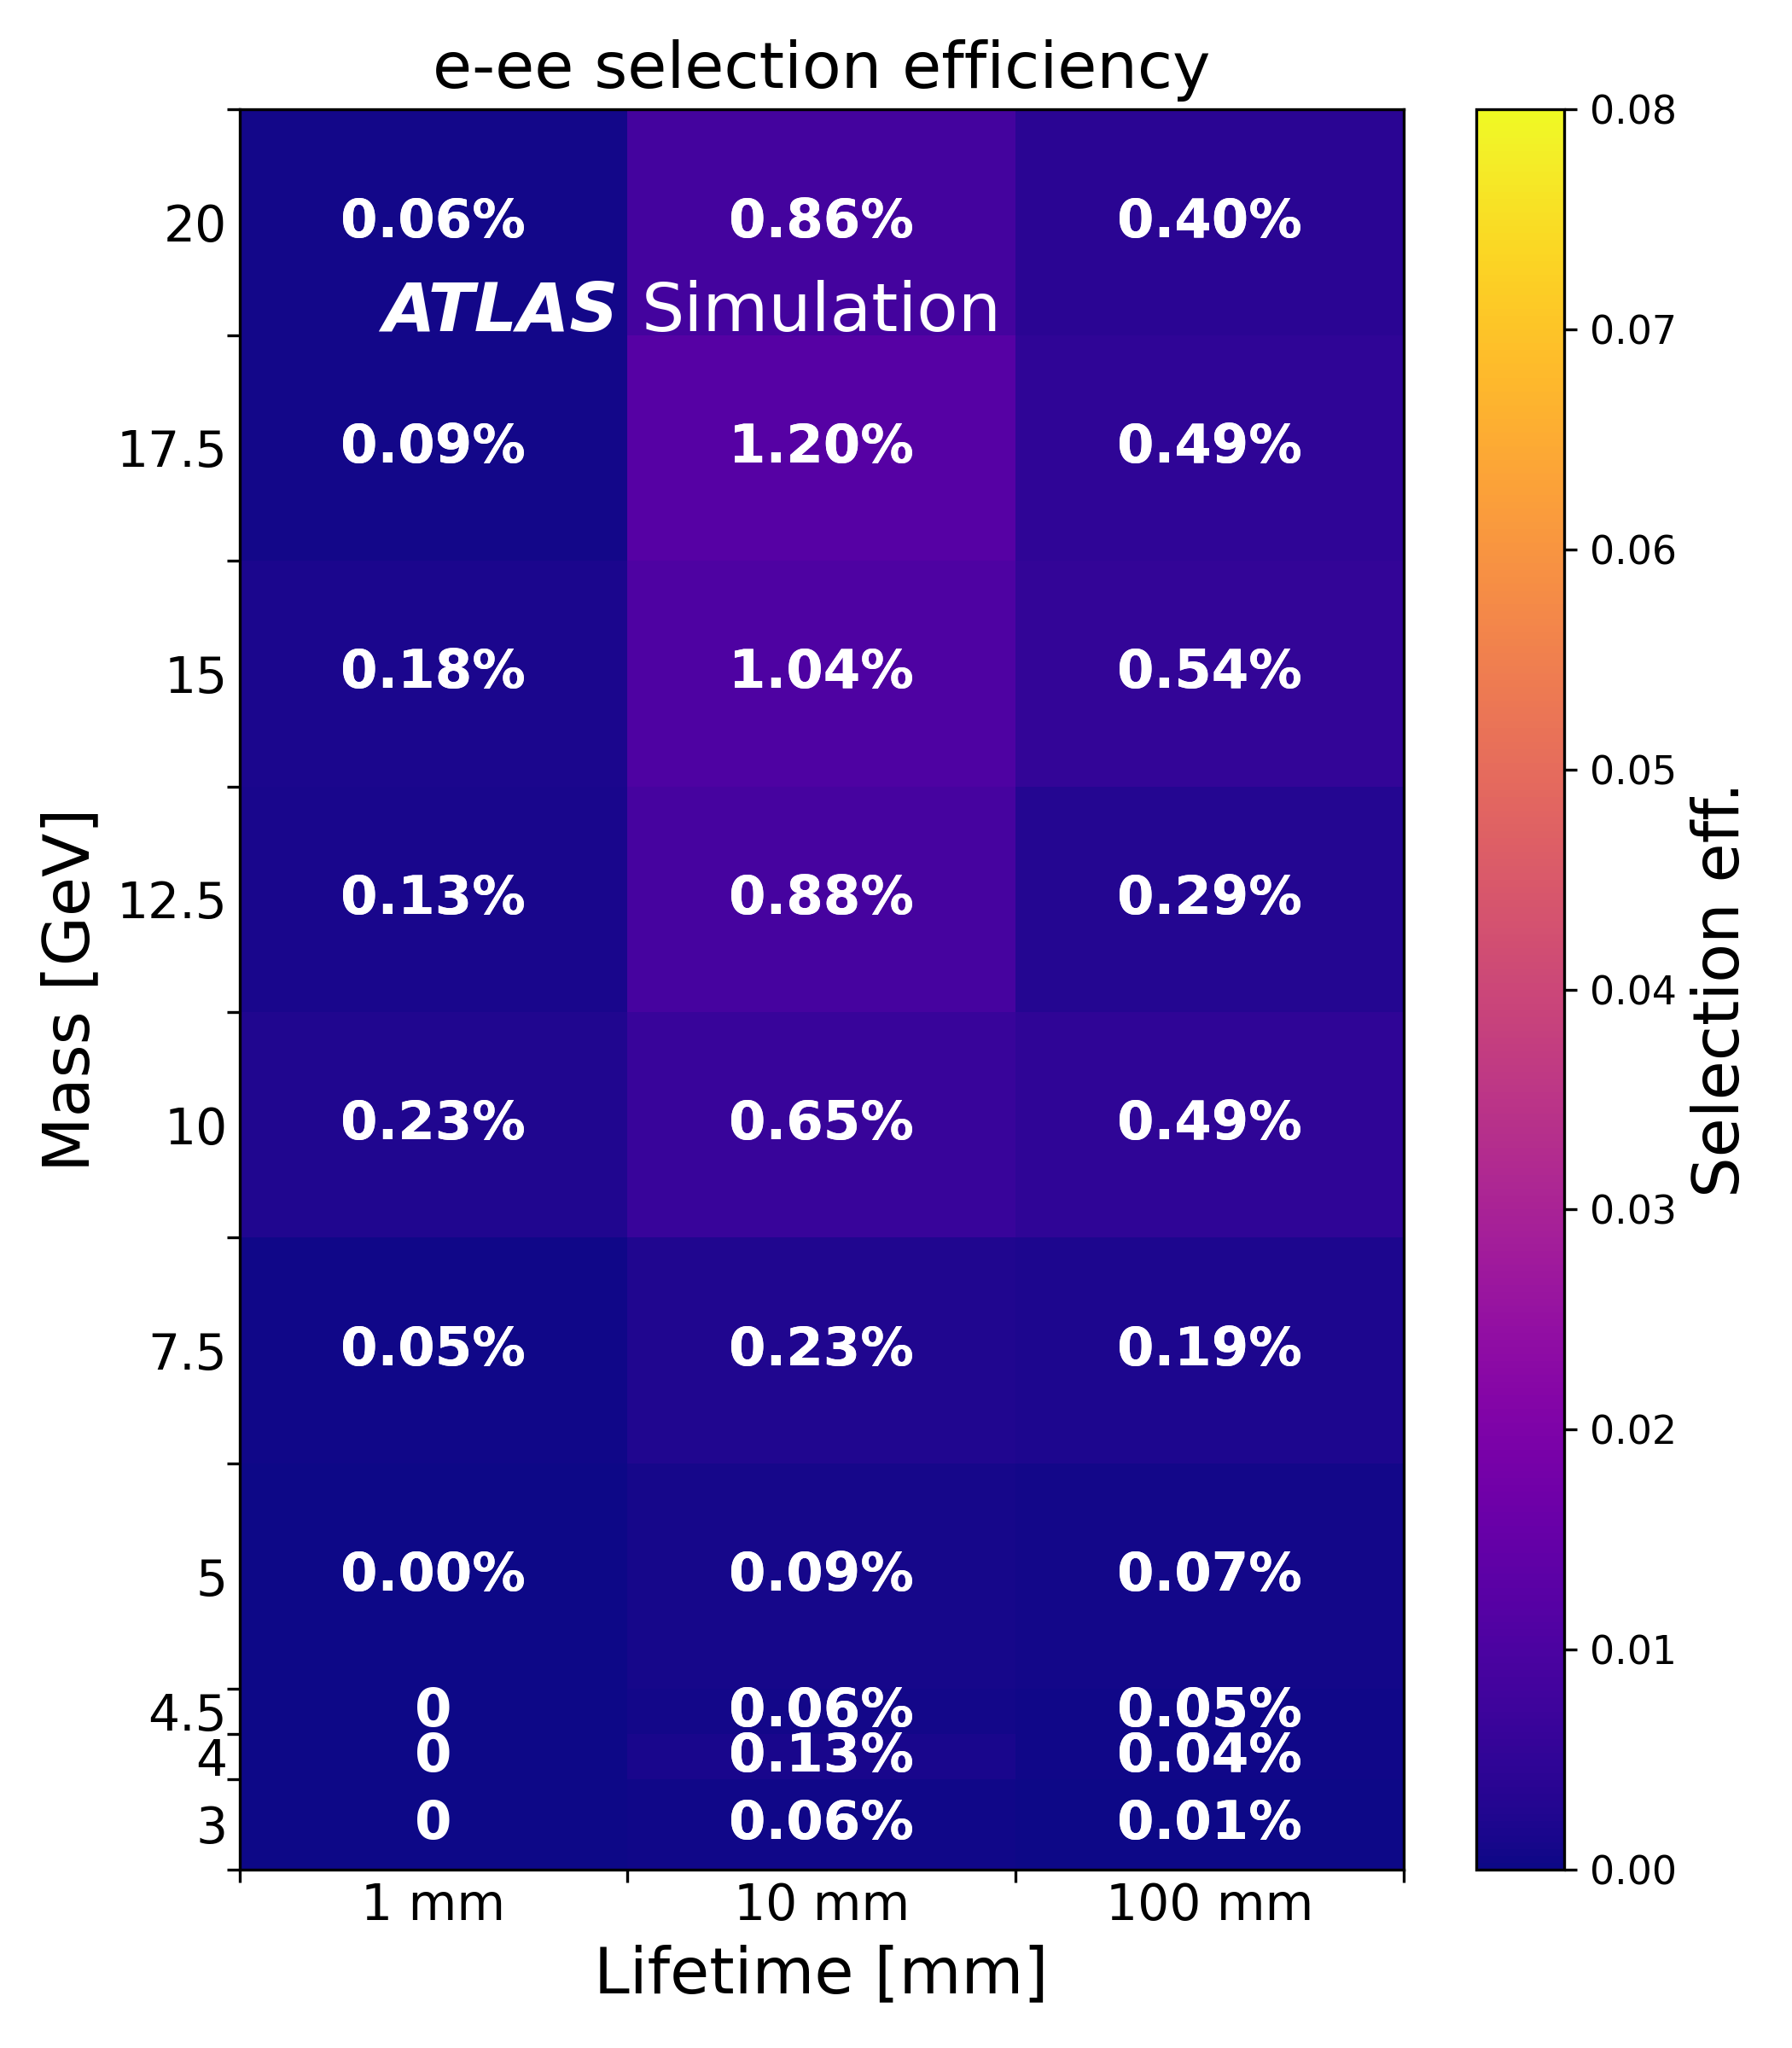

/home/newhouse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


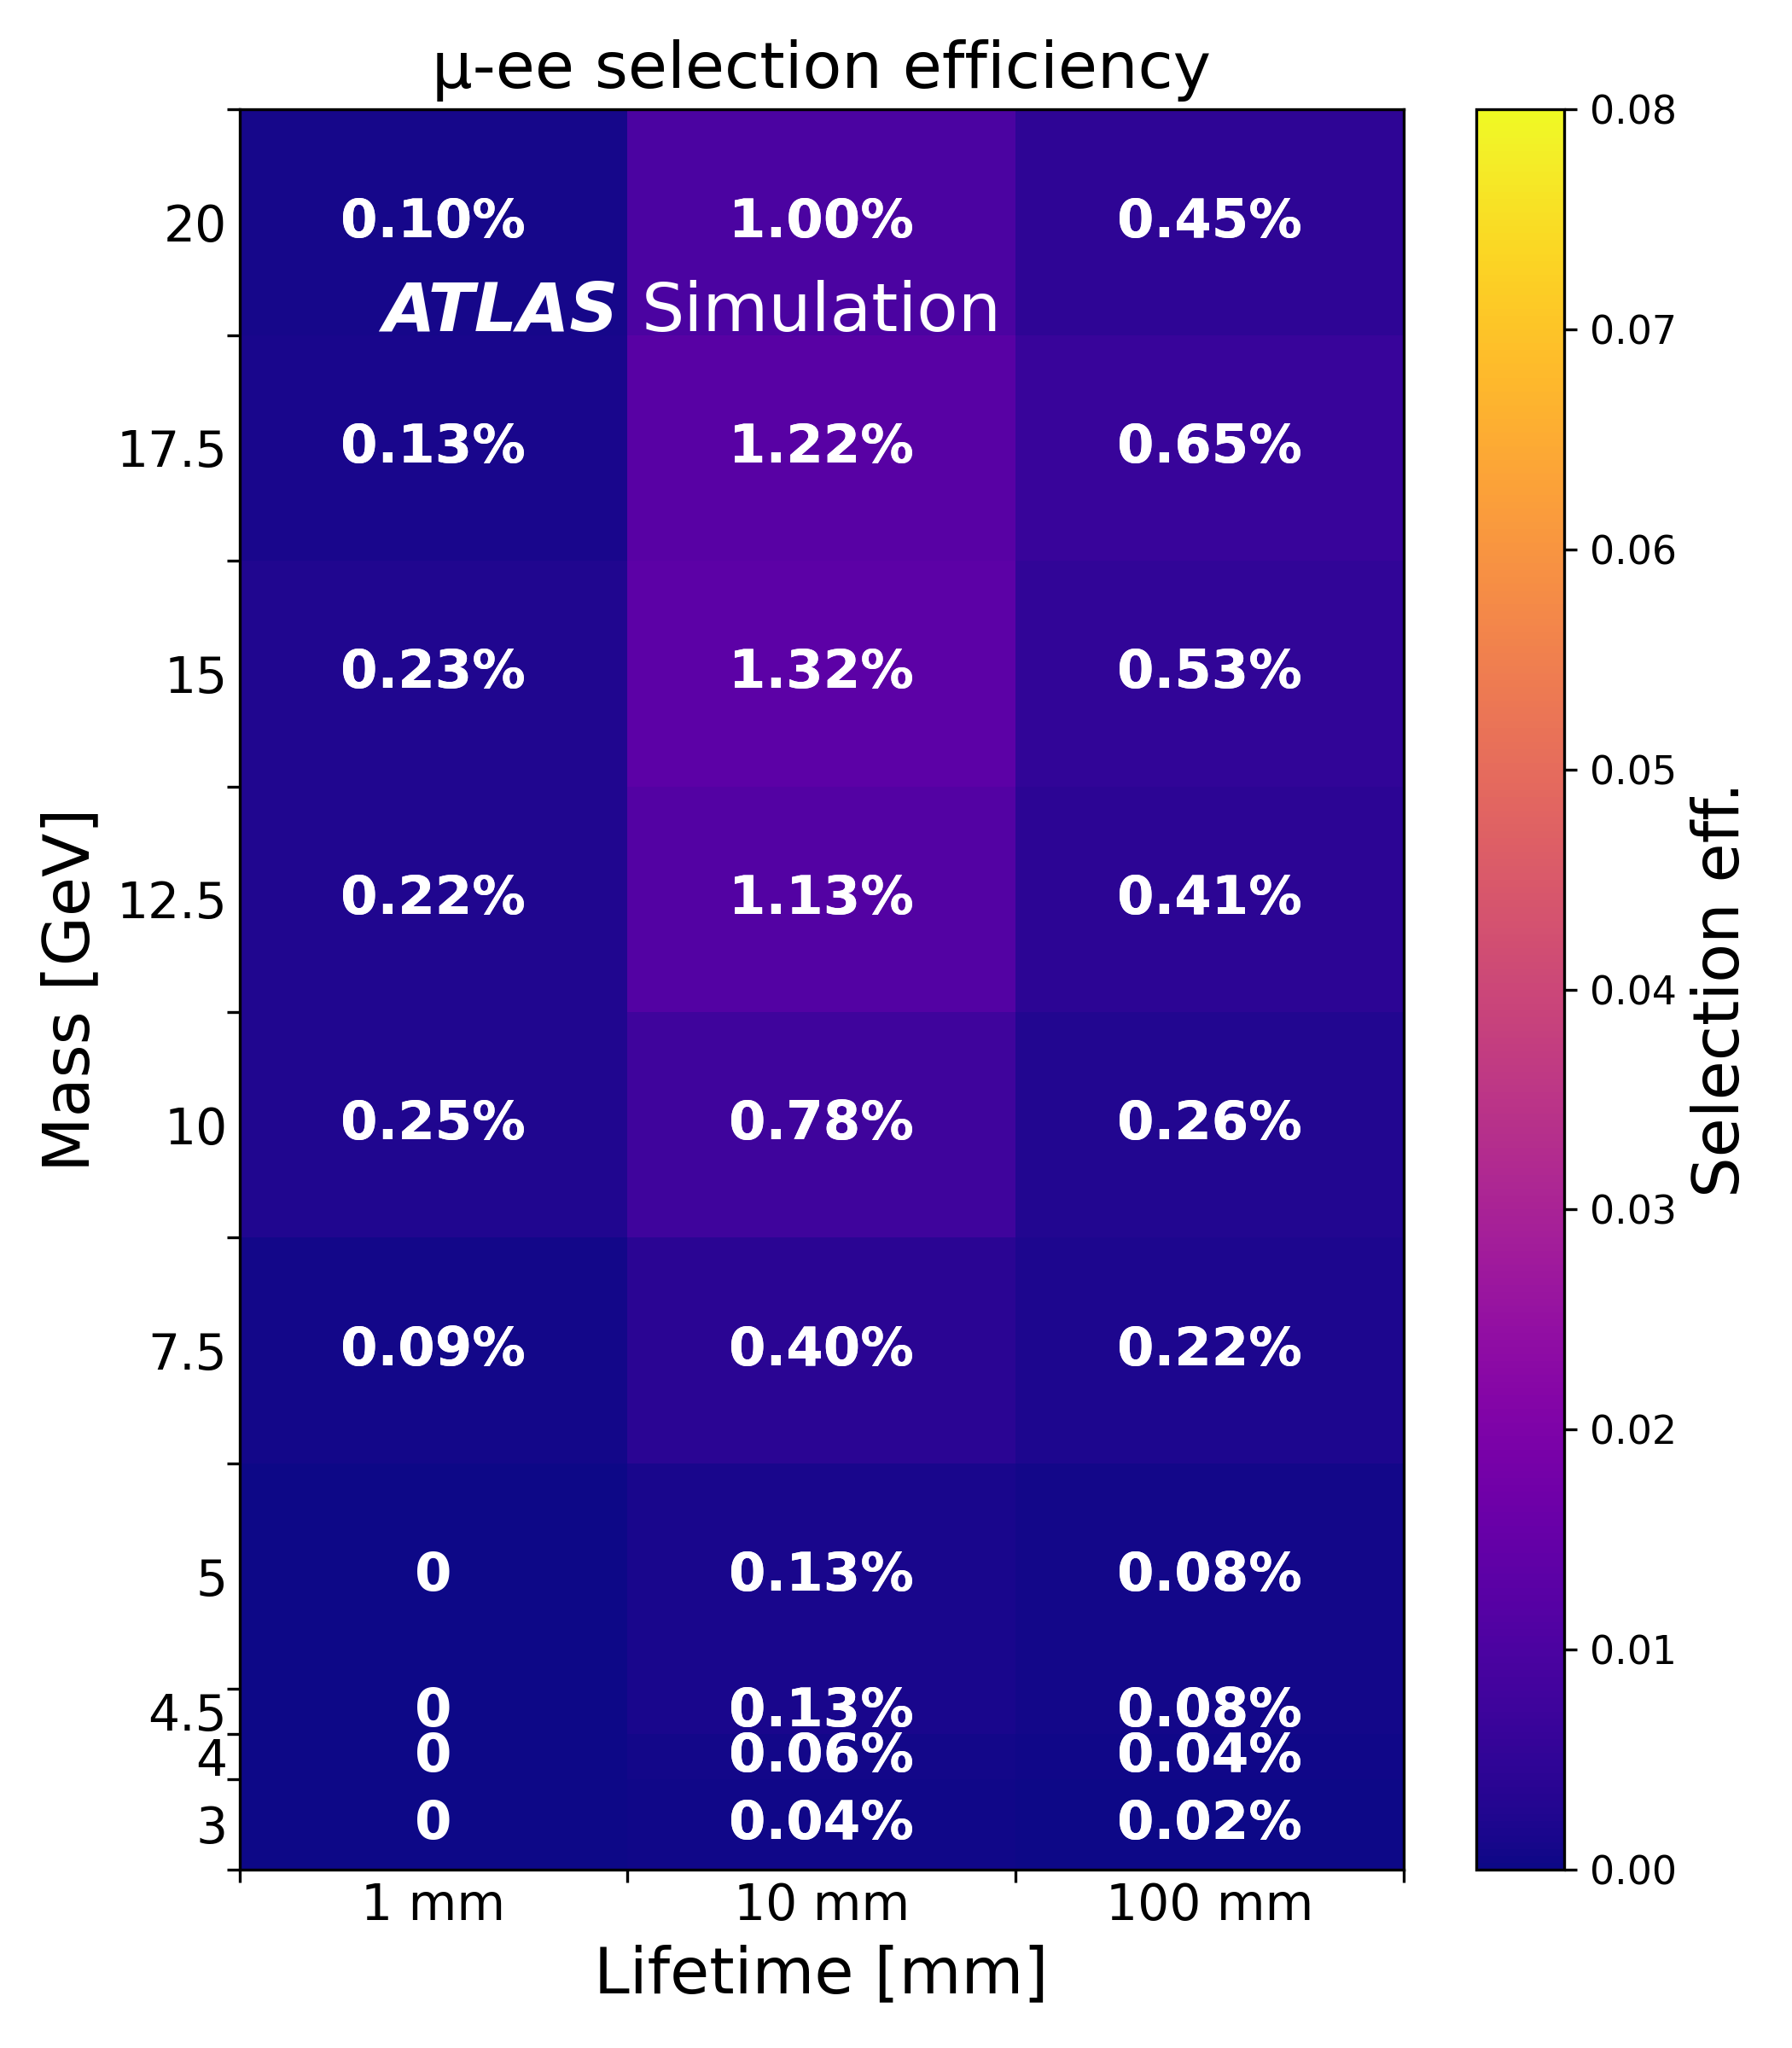

/home/newhouse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator


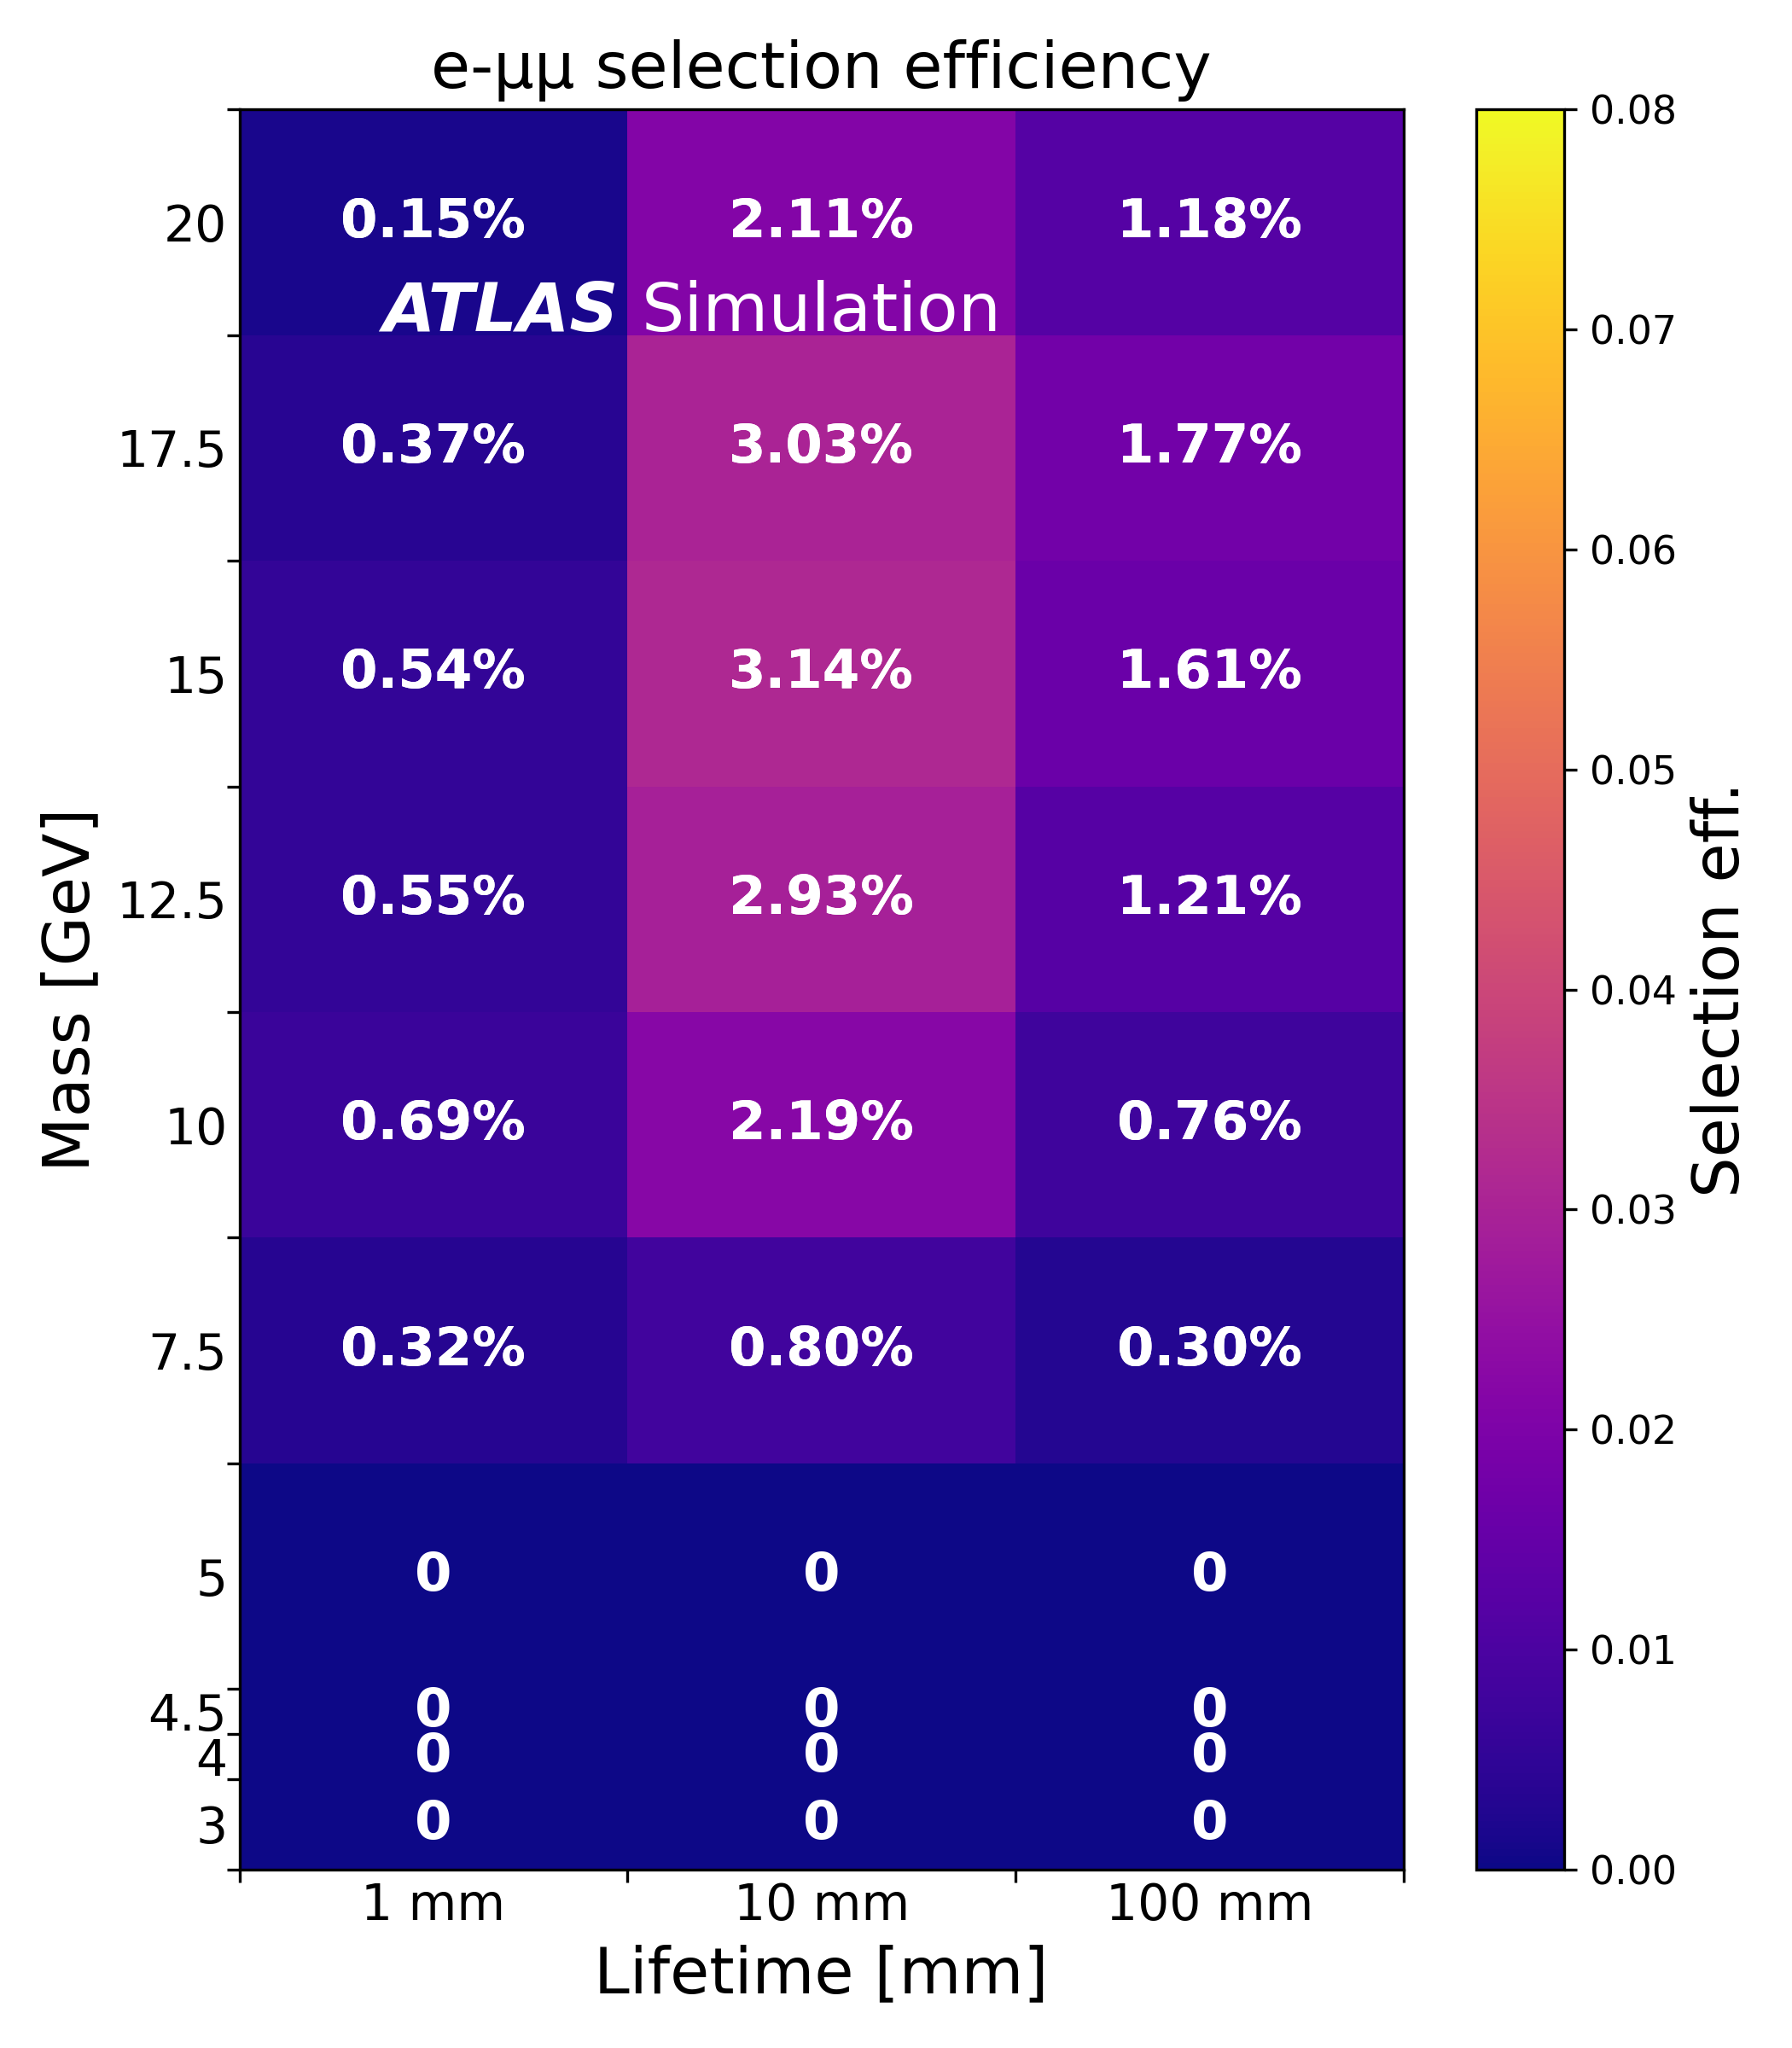

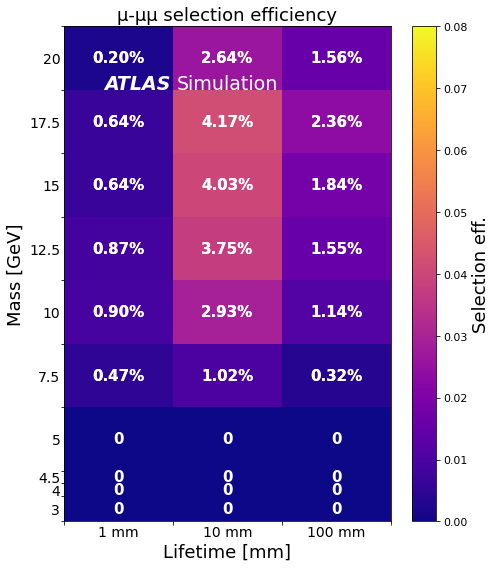

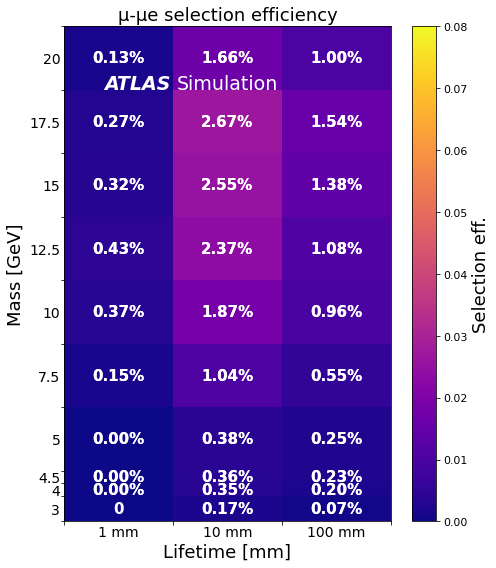

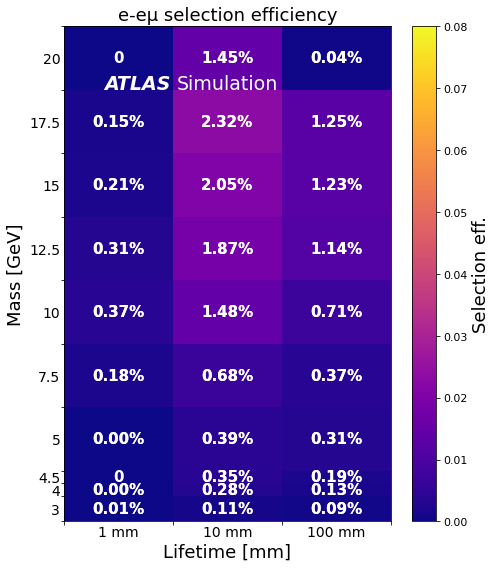

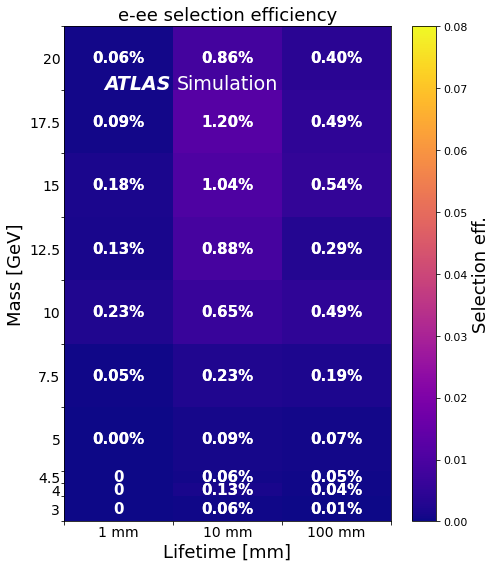

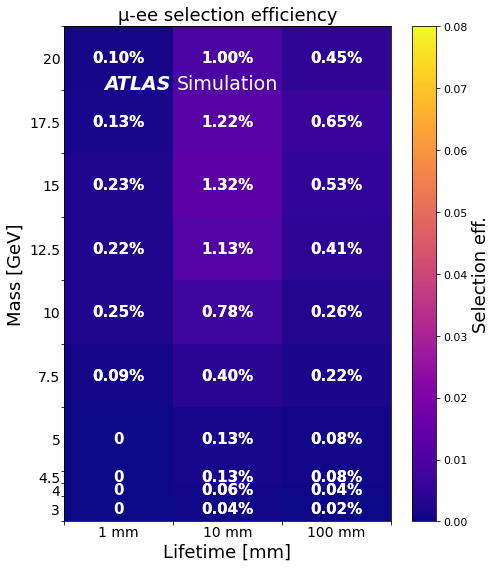

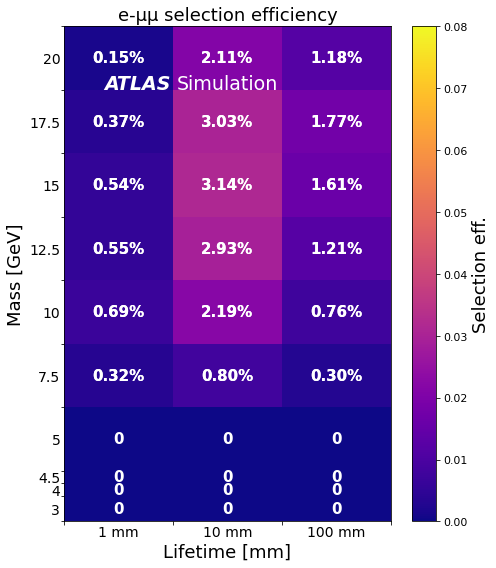

In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display, Image
import yaml


masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}

text_options = {
    'ha' : 'center',
    'va' : 'center',
    'fontweight' : 'bold',
    'fontsize': 15,
}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_uncertainty_plot(histpath, title, outfile):

    count_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    count_arr_1 = np.array(count_arr)

    # get bins from ntuples    
    for hist_file in glob.glob(f'{indir_1}{histpath}'):
        try:
            f_fullrun2_1 = uproot.open(hist_file)
        except Exception as e: 
            print(e)

        count_1 = -100
        try:
            if weighted: 
                cutflow = f_fullrun2_1['nominal/VSI_LeptonsMod/CutFlow/CutFlow_weighted_one_hnl_majorana']
                count_1 = cutflow.numpy()[0][-1] / cutflow.numpy()[0][0]
            else:
                cutflow = f_fullrun2_1['nominal/VSI_LeptonsMod/CutFlow/CutFlow']
                count_1 = cutflow.numpy()[0][-1] / cutflow.numpy()[0][0]
                # count_1 = len(f_fullrun2_1['nominal_VSI_LeptonsMod_ntuples_LNC_plus_LNV_mHNL']['HNLm'])
        except Exception as e:
            print(e) 
            count_1 = 0

        count_1 = count_1

        # get sample info from filename
        tokens = hist_file.split('histograms_fullrun2_')[1].split('_')
        file_mass = float(tokens[0][:-1].replace('p','.'))
        file_lifetime = int(tokens[1].split('mm')[0])

        set_bin_content(file_mass, file_lifetime, count_1, count_arr_1)


    # do the plotting
    plot_uncertainties(count_arr_1, title, outfile)
    return count_arr_1

def plot_uncertainties(count_arr_1, title, outfile):
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, count_arr_1, vmin=0, vmax=.08, cmap='plasma') # <<<<<<<<<<<< z axis range
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=11)
    ax = plt.gca()

    # mess with x ticks
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels('', fontsize=20)
    ax.set_xticklabels(['1 mm', '10 mm', '100 mm',], minor=True)
    ax.set_xticks([0.5,1.5,2.5,], minor=True, )
    ax.tick_params(axis='both', which='minor', length=0, labelsize=14)

    # mess with y ticks
    ax.set_yticks(masses)
    ax.set_yticklabels('')
    ax.tick_params(which='minor', length=0)
    ax.set_yticks(masses[:-1] + np.diff(masses)/2, minor=True)
    ax.set_yticklabels(masses[:-1], minor=True, size=14)

    # mess with axis labels
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Lifetime [mm]', fontsize=18)
    ax.set_ylabel('Mass [GeV]', fontsize=18)
    cbar.set_label('Selection eff.', fontsize=18)


    # # place a text box  - white face
    # #==============================================================================================================================================================================
    # props = dict(boxstyle='square', facecolor='white', alpha=1.0, linewidth=0 )
    # atlas_x = 0.2
    # atlas_y = 0.87
    # ax.text(atlas_x, atlas_y, 'ATLAS', transform=ax.transAxes, fontsize=14, verticalalignment='center', fontstyle='italic', fontweight='bold', bbox=props)
    # ax.text(atlas_x + 0.16, atlas_y, 'Internal', transform=ax.transAxes, fontsize=14, verticalalignment='center', bbox=props)
    # #==============================================================================================================================================================================
    # place a text box 
    #==============================================================================================================================================================================
    props = dict(boxstyle='square', facecolor='white', alpha=0, linewidth=0 )
    atlas_x = 0.123
    atlas_y = 0.885
    internal_x = 0.345
    ax.text(atlas_x, atlas_y, 'ATLAS', transform=ax.transAxes, fontsize=19, verticalalignment='center', fontstyle='italic', fontweight='bold', bbox=props, color='white')
    ax.text(internal_x, atlas_y, 'Simulation', transform=ax.transAxes, fontsize=19, verticalalignment='center', bbox=props, color='white')
    #==============================================================================================================================================================================

    plt.tight_layout()

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2
            if count_arr_1[i,j] > 0:
                delim = '\n' if masses[i] >= 5 else ' : '
                text = f'{count_arr_1[i,j]:0.2%}'
                ax.text(yloc, xloc , text, color='white', transform=ax.transData, **text_options)
            elif count_arr_1[i,j] == 0:
                text = f'{int(count_arr_1[i,j])}'
            else:
                text = f'no sig.'
            ax.text(yloc, xloc , text, color='white', transform=ax.transData, **text_options)

    os.makedirs(outdir, exist_ok=True)
    plt.savefig(outdir+outfile+'.png', dpi=300)
    plt.savefig(outdir+outfile+'.pdf', dpi=300)

weighted = True
indir_1 = '/data/hnl/histograms/v9p3_histograms/'
outdir = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/hepdata/plots/'

uuu_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_uuu.root', title='μ-μμ selection efficiency', outfile='efficiency_uuu')
display(Image(filename=f'{outdir}efficiency_uuu.png'));

uue_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_uue.root', title='μ-μe selection efficiency', outfile='efficiency_uue')
display(Image(filename=f'{outdir}efficiency_uue.png'));

eeu_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_eeu.root', title='e-eμ selection efficiency', outfile='efficiency_eeu')
display(Image(filename=f'{outdir}efficiency_eeu.png'));

eee_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_eee.root', title='e-ee selection efficiency', outfile='efficiency_eee')
display(Image(filename=f'{outdir}efficiency_eee.png'));

uee_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_uee.root', title='μ-ee selection efficiency', outfile='efficiency_uee')
display(Image(filename=f'{outdir}efficiency_uee.png'));

euu_counts = make_uncertainty_plot(histpath='histograms_fullrun2_*_euu.root', title='e-μμ selection efficiency', outfile='efficiency_euu')
display(Image(filename=f'{outdir}efficiency_euu.png'));

In [58]:
for counts in [
    uuu_counts,
    uue_counts,
    eeu_counts,
    eee_counts,
    uee_counts,
    euu_counts,
    ]:

    divisor = 1
    # divisor = 5e4

    tmp_dict = {
        '1mm'   : (np.flipud(counts)[:,0]/divisor).tolist(),
        '10mm'  : (np.flipud(counts)[:,1]/divisor).tolist(),
        '100mm' : (np.flipud(counts)[:,2]/divisor).tolist(),
        'masses': list(reversed(masses)),
    }
    print()
    print(yaml.dump(tmp_dict, sort_keys=False))


1mm:
- 0.002016899639132236
- 0.006372766910715975
- 0.0063529284299486365
- 0.008678963562239099
- 0.008984432168147176
- 0.004695306376360146
- 0.0
- 0.0
- 0.0
- 0.0
10mm:
- 0.026370354536556867
- 0.04172219585493282
- 0.04027600136462687
- 0.037503614806636075
- 0.0293467694010191
- 0.010192701335490434
- 0.0
- 0.0
- 0.0
- 0.0
100mm:
- 0.015588118332357783
- 0.023551099270218274
- 0.018370238533681086
- 0.015454683273025127
- 0.011438733948756363
- 0.0032337143557345537
- 0.0
- 0.0
- 0.0
- 0.0
masses:
- 22.5
- 20
- 17.5
- 15
- 12.5
- 10
- 7.5
- 5
- 4.5
- 4
- 3


1mm:
- 0.0012612518631154894
- 0.0027279166559185434
- 0.003197325818064633
- 0.004288118958748259
- 0.0037077404298464516
- 0.0015401288306623592
- 1.6386221587112821e-06
- 1.306986907109718e-06
- 3.5541127558071437e-05
- 0.0
10mm:
- 0.0166034781577147
- 0.026717223239451558
- 0.02547227187634439
- 0.023673488985571114
- 0.018715284848050226
- 0.010409152952533298
- 0.003756833982685718
- 0.00358052923189116
- 0.0034661240

In [88]:
from hepdata_lib import Submission, Variable, Table

table = Table("Selection Efficiency")

x = Variable("Lifetime", is_independent=True, is_binned=False)
x.units = 'mm'
x.values = list(lifetimes.keys()) * 10
# x.values = [(0,1), (1,10), (10,100)] * 10 # binned
table.add_variable(x)

y = Variable("Mass", is_independent=True, is_binned=False)
y.units = 'GeV'
y.values = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20] * 3
table.add_variable(y)

for counts, channel in [
    (uuu_counts, 'uuu'),
    (uue_counts, 'uue'),
    (eeu_counts, 'eeu'),
    (eee_counts, 'eee'),
    (uee_counts, 'uee'),
    (euu_counts, 'euu'),
    ]:

    divisor = 1
    # divisor = 5e4

    eff = Variable(f'{channel}', is_independent=False, is_binned=False)
    eff.values = counts.flatten()

    table.add_variable(eff)

table.description = f'The event selection efficiency for each mass-lifetime point in all six studied channels. Shown is the percentage of the produced MC simulation events that pass all signal region selections. An entry of 0 indicates no events were selected.' 
table.location = 'Data corresponds to Figure XXXXXX' 
table.keywords['phrases'] = ['efficiency', 'selection']
table.keywords['cmenergies'] = [13000]



sub = Submission()
sub.add_table(table)
sub.create_files("./efficiencies/", remove_old=True)
